In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import SVC
from xgboost import XGBRFClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

In [30]:
url="https://github.com/anvarnarz/praktikum_datasets/blob/main/E-Commerce-Dataset.xlsx?raw=true"

df = pd.read_excel(url, sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


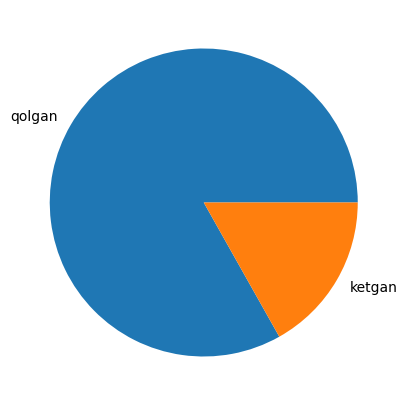

In [17]:
churn_date = df['Churn'].value_counts()/len(df)*100
plt.figure(figsize=(5,5))
plt.pie(churn_date,labels=['qolgan','ketgan'])
plt.show()

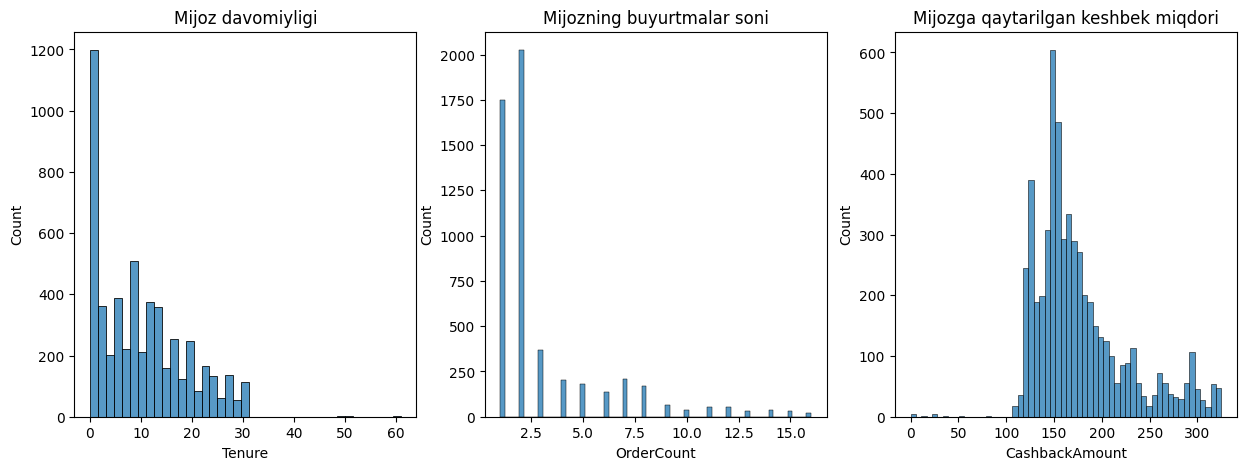

In [23]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.histplot(data=df,x='Tenure',ax=axes[0])
axes[0].set_title('Mijoz davomiyligi')

sns.histplot(data=df, x='OrderCount', ax=axes[1])
axes[1].set_title('Mijozning buyurtmalar soni')

sns.histplot(data=df, x='CashbackAmount',ax=axes[2])
axes[2].set_title('Mijozga qaytarilgan keshbek miqdori')
plt.show()

Kategoriyalik ustunlarni tahlil qilamiz

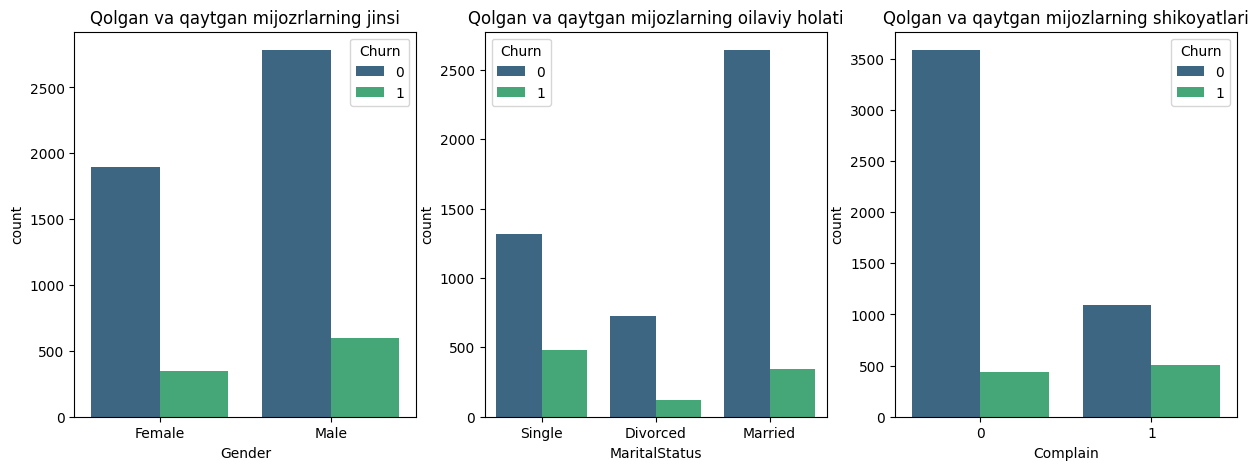

In [29]:
from time import altzone
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='Churn', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qolgan va qaytgan mijozrlarning jinsi")

sns.countplot(x='MaritalStatus',hue='Churn',data=df,palette='viridis',ax=axes[1])
axes[1].set_title("Qolgan va qaytgan mijozlarning oilaviy holati")

sns.countplot(x='Complain',hue='Churn',data=df,palette='viridis',ax=axes[2])
axes[2].set_title("Qolgan va qaytgan mijozlarning shikoyatlari")
plt.show()

In [34]:
df[[ 'Churn', 'Tenure', 'CityTier',
       'WarehouseToHome','HourSpendOnApp',
       'NumberOfDeviceRegistered','SatisfactionScore',
       'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']].corrwith(df['Churn']).abs().sort_values(ascending=False)

Churn                          1.000000
Tenure                         0.349408
Complain                       0.250188
DaySinceLastOrder              0.160757
CashbackAmount                 0.154118
NumberOfDeviceRegistered       0.107939
SatisfactionScore              0.105481
CityTier                       0.084703
WarehouseToHome                0.076630
NumberOfAddress                0.043931
OrderCount                     0.028697
HourSpendOnApp                 0.018675
OrderAmountHikeFromlastYear    0.010058
CouponUsed                     0.008264
dtype: float64

malumotlarga ishlov berish

In [36]:
#malumotlarni tekshirib olamiz
print(f"mavjud bo'lmagan qiymatlar soni{df.isnull().sum().sum()}")
print(f"mavjud bolmagan qiymatlar {round(df.isna().sum().sum()/len(df)*100)}%")

mavjud bo'lmagan qiymatlar soni1856
mavjud bolmagan qiymatlar 33%


In [45]:
#korrelyatsiyasi yuqori bolgan ustunlarni tekshirib koramiz
data = df[[ 'Churn', 'Tenure', 'CityTier','PreferredLoginDevice','PreferredPaymentMode',
       'WarehouseToHome','Gender','PreferedOrderCat','MaritalStatus',
       'NumberOfDeviceRegistered','SatisfactionScore',
       'NumberOfAddress', 'Complain',
       'DaySinceLastOrder', 'CashbackAmount']]

print(f"mavjud bo'lmagan qiymatlar soni{data.isnull().sum().sum()}")
print(f"mavjud bolmagan qiymatlar {round(data.isna().sum().sum()/len(data)*100)}%\ndataset olchami= {data.shape}")

mavjud bo'lmagan qiymatlar soni822
mavjud bolmagan qiymatlar 15%
dataset olchami= (5630, 15)


In [46]:
#malumotlarimiz yetarli deb oylayman shuning uchun ham nan qiymatlarni tashlab yuboraman
data = data.dropna()

ML ga tayyorgarlik

In [56]:
encoded = pd.get_dummies(data)#string malumot turidagi ustunlarni sonli korinishga ogiramiz
encoded['Churn'].value_counts()

Churn
0    4079
1     729
Name: count, dtype: int64

In [59]:
#datasetni ikki qismga ajratib olamiz
X= encoded.drop('Churn',axis=1)
y= encoded['Churn']
#malumotlarni normalizatsiyalaymiz
scaler= StandardScaler()
X = scaler.fit_transform(X)
#labellarni train va test qismga ajratib olamiz
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=.1,stratify= y, random_state=0)

ML Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       408
           1       0.76      0.62      0.68        73

    accuracy                           0.91       481
   macro avg       0.85      0.79      0.82       481
weighted avg       0.91      0.91      0.91       481

Model aniqligi: 0.9126819126819127


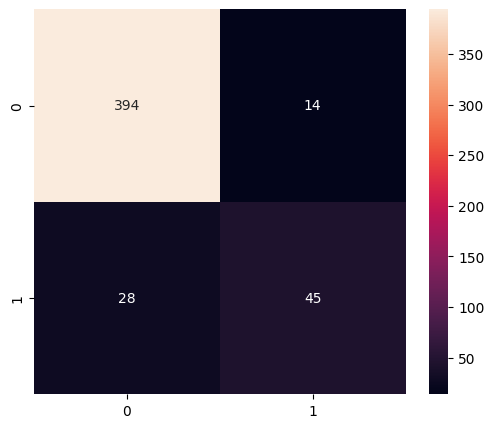

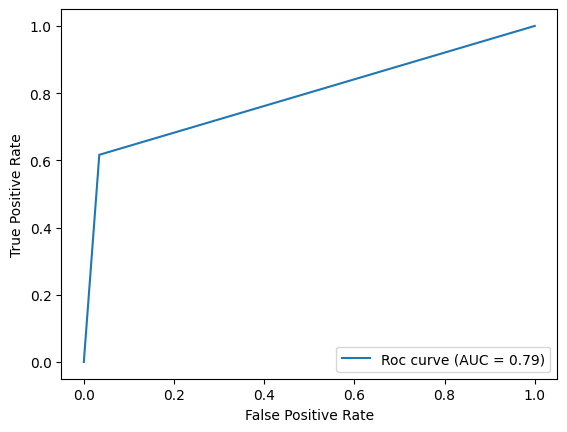

In [68]:
LR_model = LogisticRegression()#logistic regressionni chaqirib olamiz
#modelni oqitib olamiz
LR_model.fit(X_train,y_train)

#modelni baholaymiz
y_predict = LR_model.predict(X_test)
print(metrics.classification_report(y_test,y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))
#confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(metrics.confusion_matrix(y_test,y_predict),annot=True,fmt='g')
plt.show()
#Roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc curve')
display.plot()
plt.show()

Supper Vecotor Machines

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       408
           1       0.76      0.62      0.68        73

    accuracy                           0.91       481
   macro avg       0.85      0.79      0.82       481
weighted avg       0.91      0.91      0.91       481

Model aniqligi: 0.9126819126819127


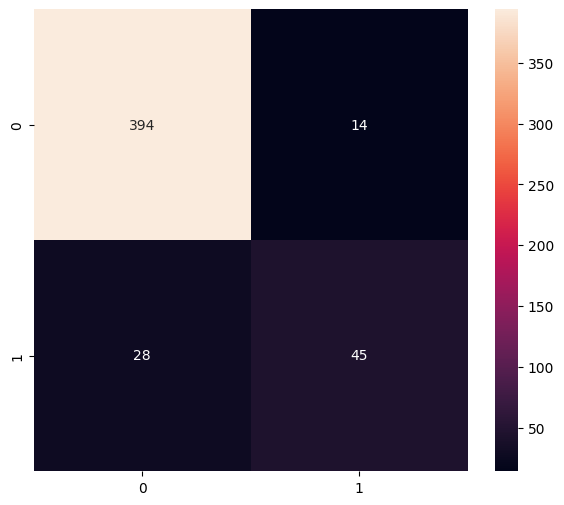

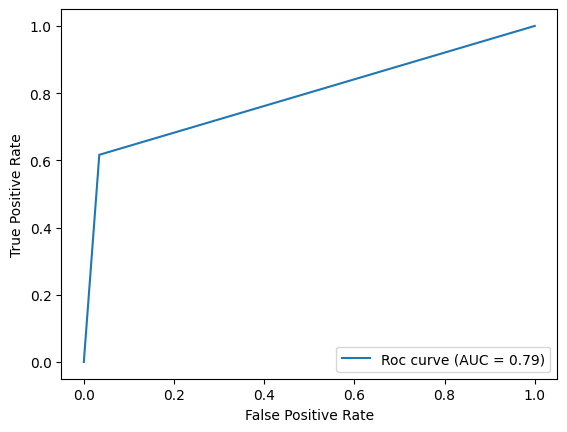

In [71]:
svm_model = SVC()
svm_model.fit(X_train,y_train)
y_predict = svm_model.predict(X_test)

y_predict = LR_model.predict(X_test)
print(metrics.classification_report(y_test,y_predict))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_predict))
#confusion matrix
plt.figure(figsize=(7,6))
sns.heatmap(metrics.confusion_matrix(y_test,y_predict),annot=True,fmt='g')
#roc curve
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc curve')
display.plot()
plt.show()


Decision tree

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       408
           1       0.93      0.93      0.93        73

    accuracy                           0.98       481
   macro avg       0.96      0.96      0.96       481
weighted avg       0.98      0.98      0.98       481

Modelning aniqligi= 0.9792099792099792 %


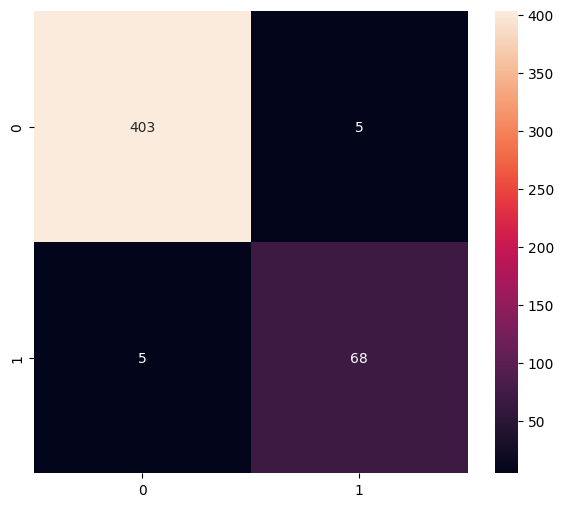

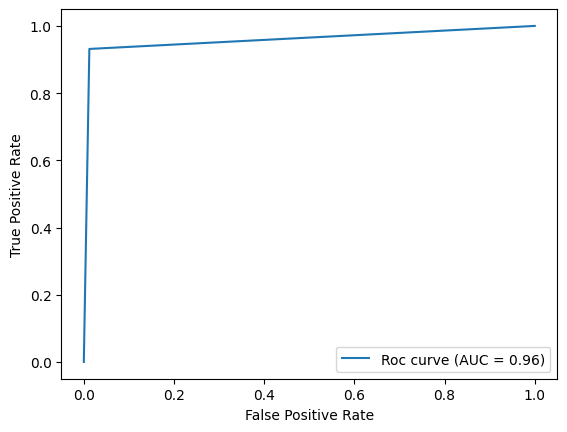

In [96]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train,y_train)
y_predict = tree_model.predict(X_test)

print(metrics.classification_report(y_test,y_predict))
print('Modelning aniqligi=',metrics.accuracy_score(y_test,y_predict),'%')

plt.figure(figsize=(7,6))
sns.heatmap(metrics.confusion_matrix(y_test,y_predict),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name="Roc curve")
display.plot()
plt.show()

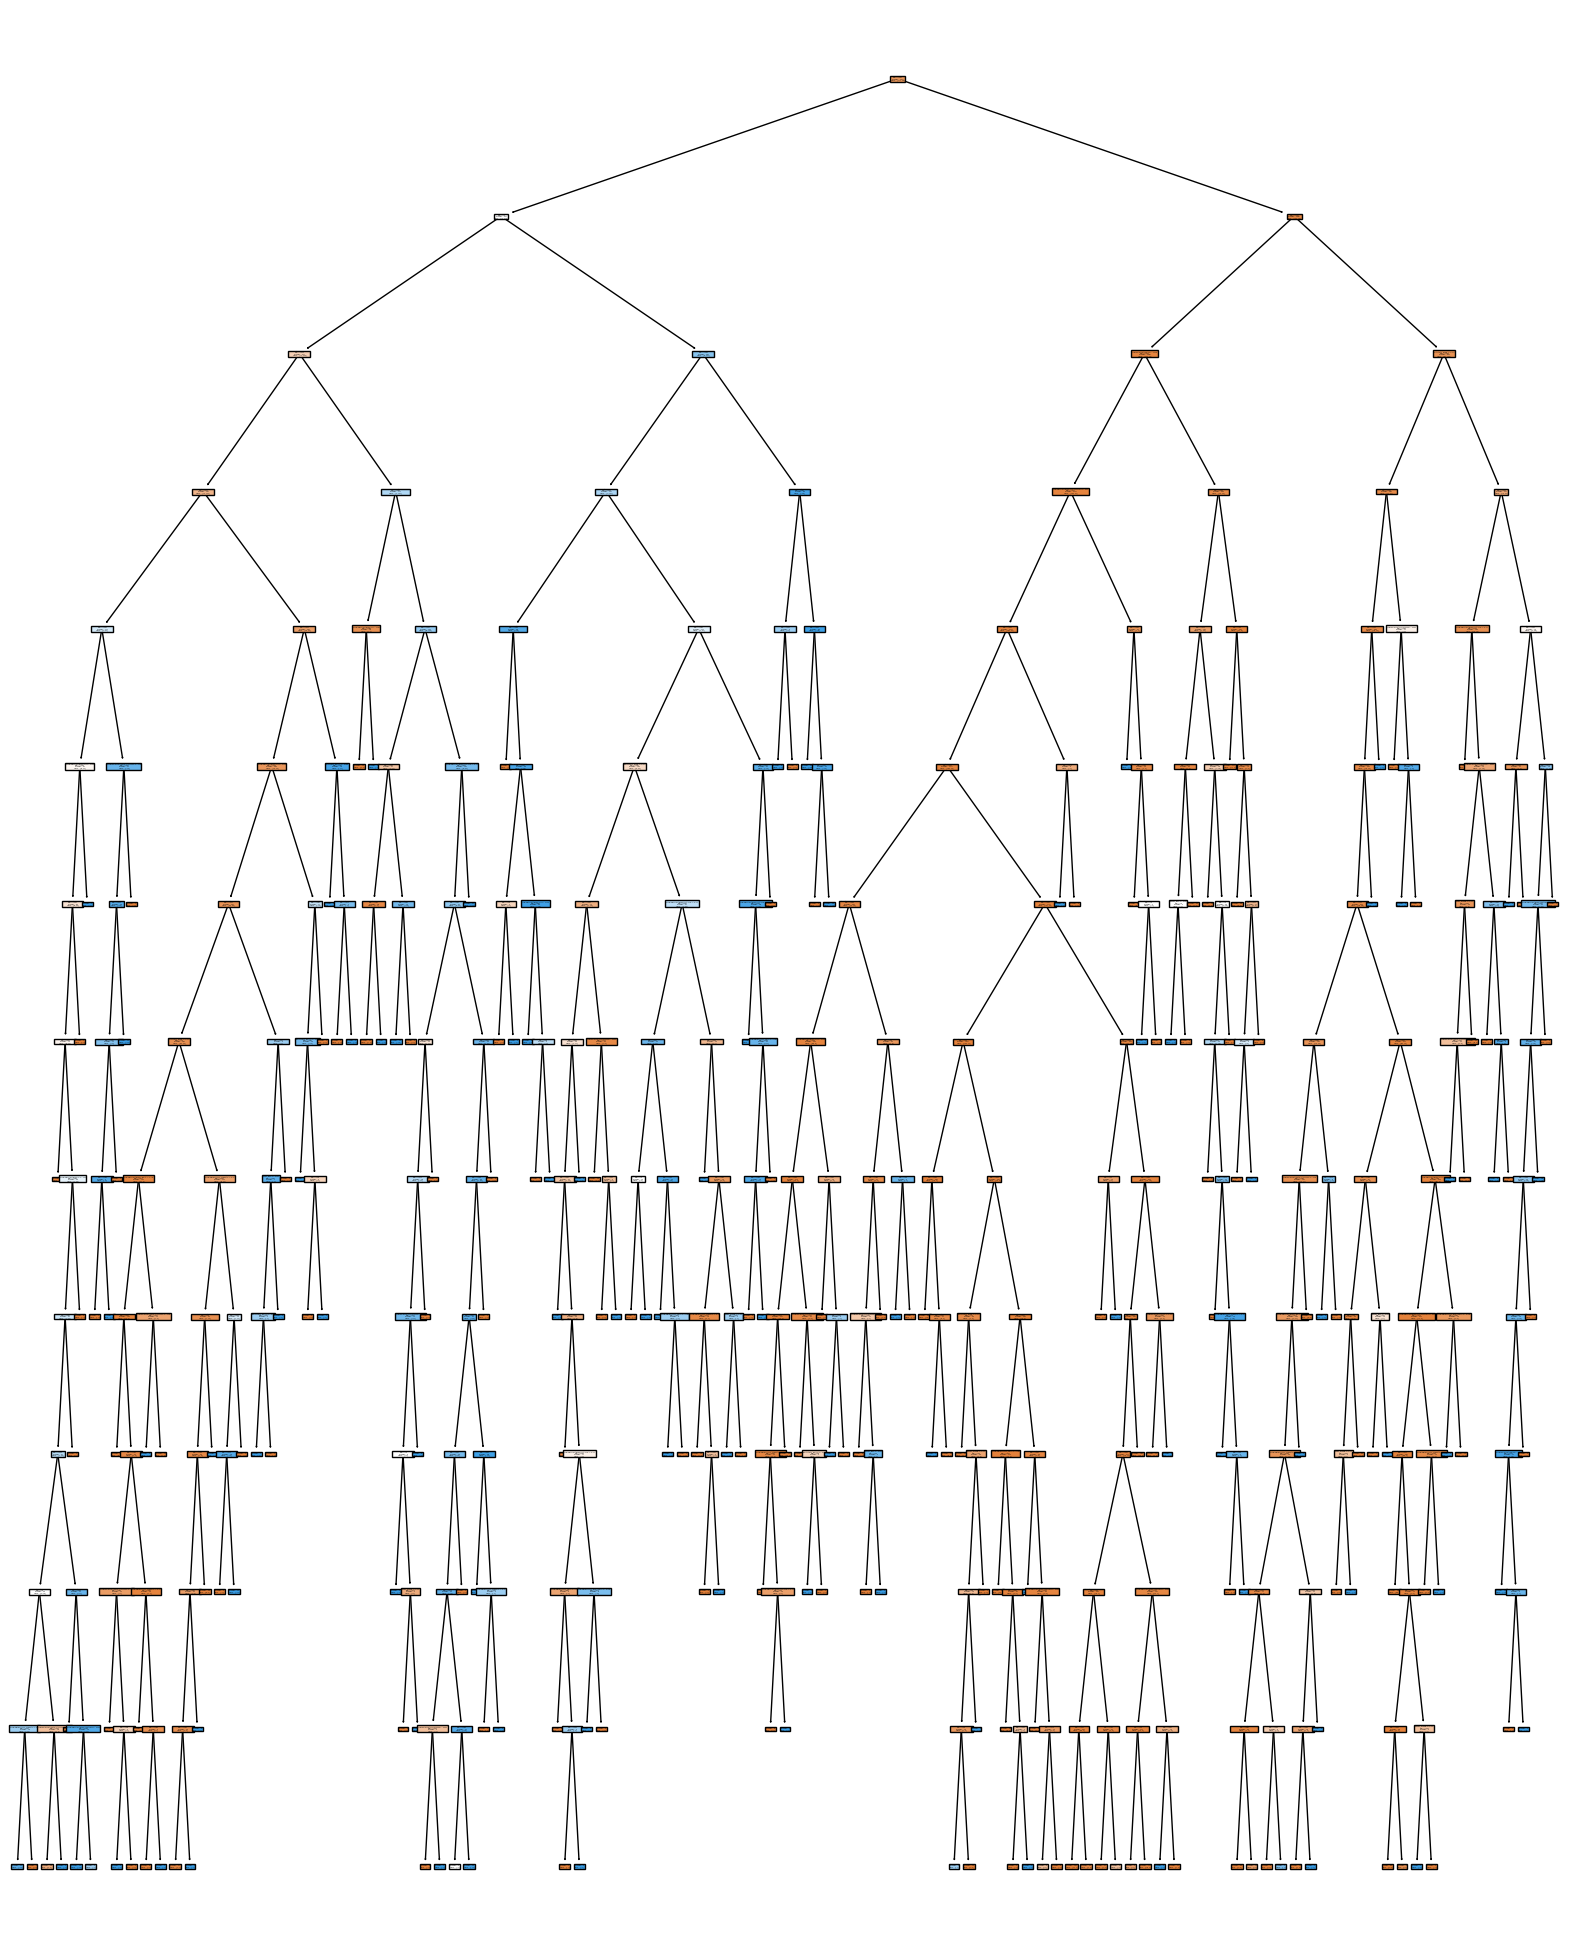

In [95]:
cols = encoded.drop('Churn',axis=1).columns
plt.figure(figsize=(20,25))
plot_tree(tree_model,feature_names=cols,filled=True)
plt.show()

Random Forest classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       408
           1       0.92      0.89      0.90        73

    accuracy                           0.97       481
   macro avg       0.95      0.94      0.94       481
weighted avg       0.97      0.97      0.97       481

Modelning aniqligi= 0.9708939708939709


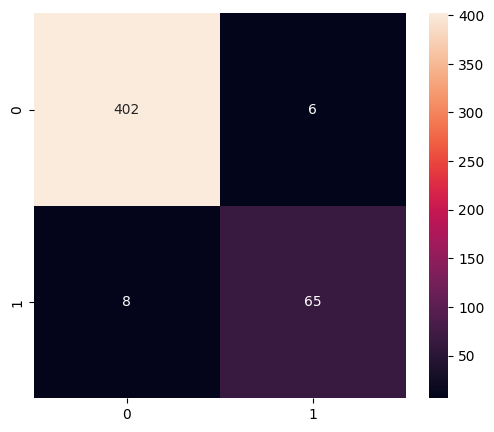

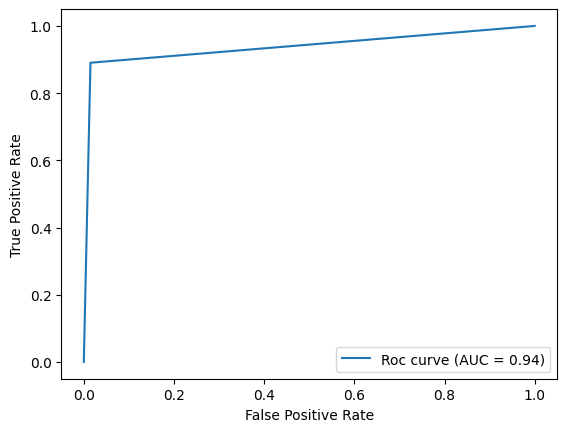

In [81]:
RF_model = RandomForestClassifier(n_estimators=5)
RF_model.fit(X_train,y_train)
y_predict = RF_model.predict(X_test)

print(metrics.classification_report(y_test,y_predict))
print('Modelning aniqligi=',metrics.accuracy_score(y_test,y_predict))

plt.figure(figsize=(6,5))
sns.heatmap(metrics.confusion_matrix(y_test,y_predict),annot=True,fmt='g')
plt.show()

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_predict)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name="Roc curve")
display.plot()
plt.show()

XGBoost

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       408
           1       0.62      0.63      0.63        73

    accuracy                           0.89       481
   macro avg       0.78      0.78      0.78       481
weighted avg       0.89      0.89      0.89       481



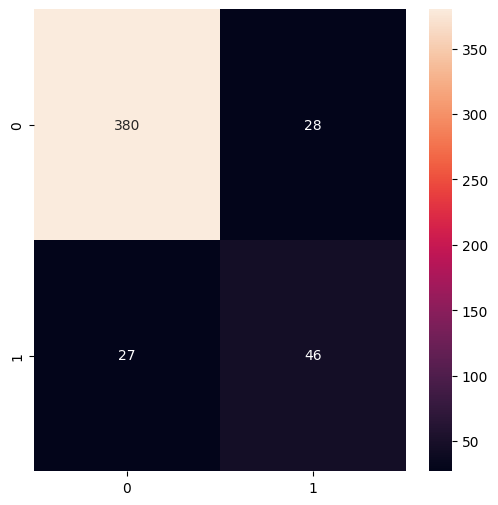

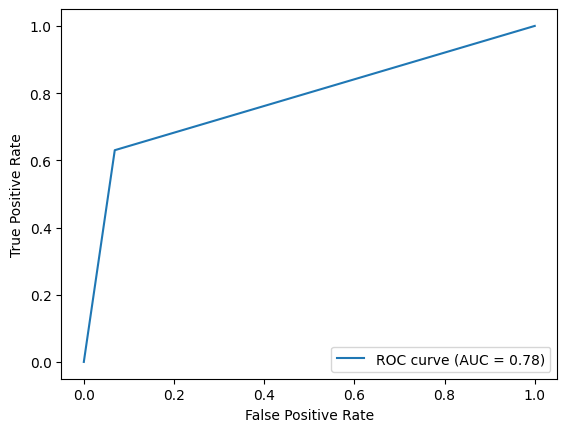

In [88]:
xgb_model = XGBRFClassifier()
xgb_model.fit(X_train,y_train)
y_predict = xgb_model.predict(X_test)

print(metrics.classification_report(y_test,y_predict))
#print('Modelning aniqligi ',metrics.accuracy_score(y_train,y_predict))

plt.figure(figsize=(6,6))
sns.heatmap(metrics.confusion_matrix(y_test,y_predict),annot=True,fmt='g')
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()